In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
# Display first few rows of the dataset
data.head(5).T

,0,1,2,3,4
gender,Female,Female,Male,Female,Male
age,80.0,54.0,28.0,36.0,76.0
hypertension,0,0,0,0,1
heart_disease,1,0,0,0,1
smoking_history,never,No Info,never,current,current
bmi,25.19,27.32,27.32,23.45,20.14
HbA1c_level,6.6,6.6,5.7,5.0,4.8
blood_glucose_level,140,80,158,155,155
diabetes,0,0,0,0,0


In [ ]:
# Check for missing values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Display the shape of the dataset
data.shape

(100000, 9)

In [ ]:
# Display the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Display the description of the dataset
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data.duplicated().sum()

3854

In [ ]:
data = data.drop_duplicates(keep="last").reset_index()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(96146, 10)

In [ ]:
data.columns

Index(['index', 'gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'diabetes'],
      dtype='object')

In [ ]:
data = data.drop(['index'],axis = 1)

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
data.head(5).T

,0,1,2,3,4
gender,Female,Male,Female,Male,Female
age,80.0,28.0,36.0,76.0,20.0
hypertension,0,0,0,1,0
heart_disease,1,0,0,1,0
smoking_history,never,never,current,current,never
bmi,25.19,27.32,23.45,20.14,27.32
HbA1c_level,6.6,5.7,5.0,4.8,6.6
blood_glucose_level,140,158,155,155,85
diabetes,0,0,0,0,0


In [ ]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
data.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Analisis Prediksi

In [ ]:
data['gender'] = data['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})
data['smoking_history'] = data['smoking_history'].replace({'No Info': 0, 'never': 1, 'former': 2, 'current': 3, 'not current': 4, 'ever':5})

In [ ]:
#Memisahkan variable prediktor
X = np.array(data.drop(['diabetes'], axis = 1))
y = data['diabetes']

In [ ]:
# Menerapkan validasi silang bertingkat
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Fungsi untuk mengevaluasi model
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    akurasi = accuracy_score(y_test, y_pred)
    presisi = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return akurasi, presisi, recall, f1, cm

# Menyimpan metrik untuk setiap model
jst_metrics_list = []
knn_metrics_list = []
nb_metrics_list = []
lr_metrics_list = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Naive Bayes

In [ ]:
# Menerapkan model
nb = GaussianNB()

# Pelatihan model
nb.fit(X_train, y_train)

# Melakukan prediksi
nb_metrics_list.append(evaluasi_model(nb, X_test, y_test))

KNN

In [ ]:
# Menerapkan model
knn = KNeighborsClassifier(n_neighbors=8)

# Pelatihan model
knn.fit(X_train, y_train)

# Melakukan prediksi
knn_metrics_list.append(evaluasi_model(knn, X_test, y_test))

Logistic Regression

In [ ]:
# Menerapkan model
lr = LogisticRegression(random_state=42)

# Pelatihan model
lr.fit(X_train, y_train)

# Melakukan prediksi
lr_metrics_list.append(evaluasi_model(lr, X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


JST

In [ ]:
# Menerapkan model
jst = MLPClassifier(random_state=42, max_iter=1000, verbose=True)

# Pelatihan model
jst.fit(X_train, y_train)

# Melakukan prediksi
jst_metrics_list.append(evaluasi_model(jst, X_test, y_test))

Iteration 1, loss = 0.48809399
Iteration 2, loss = 0.25644697
Iteration 3, loss = 0.23045669
Iteration 4, loss = 0.20507410
Iteration 5, loss = 0.18492293
Iteration 6, loss = 0.16407295
Iteration 7, loss = 0.15266543
Iteration 8, loss = 0.14235836
Iteration 9, loss = 0.13577128
Iteration 10, loss = 0.13621577
Iteration 11, loss = 0.12926059
Iteration 12, loss = 0.12603184
Iteration 13, loss = 0.12817387
Iteration 14, loss = 0.12139313
Iteration 15, loss = 0.12463631
Iteration 16, loss = 0.12490605
Iteration 17, loss = 0.12097107
Iteration 18, loss = 0.11877357
Iteration 19, loss = 0.12136975
Iteration 20, loss = 0.11870861
Iteration 21, loss = 0.11811821
Iteration 22, loss = 0.11737087
Iteration 23, loss = 0.12019056
Iteration 24, loss = 0.11724562
Iteration 25, loss = 0.11690847
Iteration 26, loss = 0.12035001
Iteration 27, loss = 0.11595858
Iteration 28, loss = 0.11628511
Iteration 29, loss = 0.11656139
Iteration 30, loss = 0.11437752
Iteration 31, loss = 0.11514290
Iteration 32, los

In [ ]:
# Menghitung rata-rata metrik untuk setiap model
def rata_rata_metrik(metrik_list):
    akurasi = np.mean([m[0] for m in metrik_list])
    presisi = np.mean([m[1] for m in metrik_list])
    recall = np.mean([m[2] for m in metrik_list])
    f1 = np.mean([m[3] for m in metrik_list])
    cm = np.mean([m[4] for m in metrik_list], axis=0)
    return akurasi, presisi, recall, f1, cm

jst_metrics = rata_rata_metrik(jst_metrics_list)
knn_metrics = rata_rata_metrik(knn_metrics_list)
nb_metrics = rata_rata_metrik(nb_metrics_list)
lr_metrics = rata_rata_metrik(lr_metrics_list)

In [ ]:
# Cetak Metrik JST
print("Neural Network (JST):")
print(f"1. Akurasi: {jst_metrics[0]}")
print(f"2. Presisi: {jst_metrics[1]}")
print(f"3. Recall: {jst_metrics[2]}")
print(f"4. F1 Score: {jst_metrics[3]}")

Neural Network (JST):
1. Akurasi: 0.957145828999376
2. Presisi: 0.9823008849557522
3. Recall: 0.5235849056603774
4. F1 Score: 0.683076923076923


In [ ]:
# Cetak Metrik KNN
print("\nK-Nearest Neighbors (KNN):")
print(f"1. Akurasi: {knn_metrics[0]}")
print(f"2. Presisi: {knn_metrics[1]}")
print(f"3. Recall: {knn_metrics[2]}")
print(f"4. F1 Score: {knn_metrics[3]}")


K-Nearest Neighbors (KNN):
1. Akurasi: 0.9524651549823174
2. Presisi: 0.9494252873563218
3. Recall: 0.48702830188679247
4. F1 Score: 0.6438035853468433


In [ ]:
# Cetak Metrik Naive Bayes
print("\nNaive Bayes:")
print(f"1. Akurasi: {nb_metrics[0]}")
print(f"2. Presisi: {nb_metrics[1]}")
print(f"3. Recall: {nb_metrics[2]}")
print(f"4. F1 Score: {nb_metrics[3]}")


Naive Bayes:
1. Akurasi: 0.9008737258165176
2. Presisi: 0.45664739884393063
3. Recall: 0.652122641509434
4. F1 Score: 0.5371539582321515


In [ ]:
# Cetak Metrik Logistic Regression
print("\nLogistic Regression:")
print(f"1. Akurasi: {lr_metrics[0]}")
print(f"2. Presisi: {lr_metrics[1]}")
print(f"3. Recall: {lr_metrics[2]}")
print(f"4. F1 Score: {lr_metrics[3]}")


Logistic Regression:
1. Akurasi: 0.9560016642396505
2. Presisi: 0.84
3. Recall: 0.6191037735849056
4. F1 Score: 0.7128309572301424


Akurasi Tertinggi :
1. JST
2. Logistic Regression
3. KNN
4. Naive Bayes

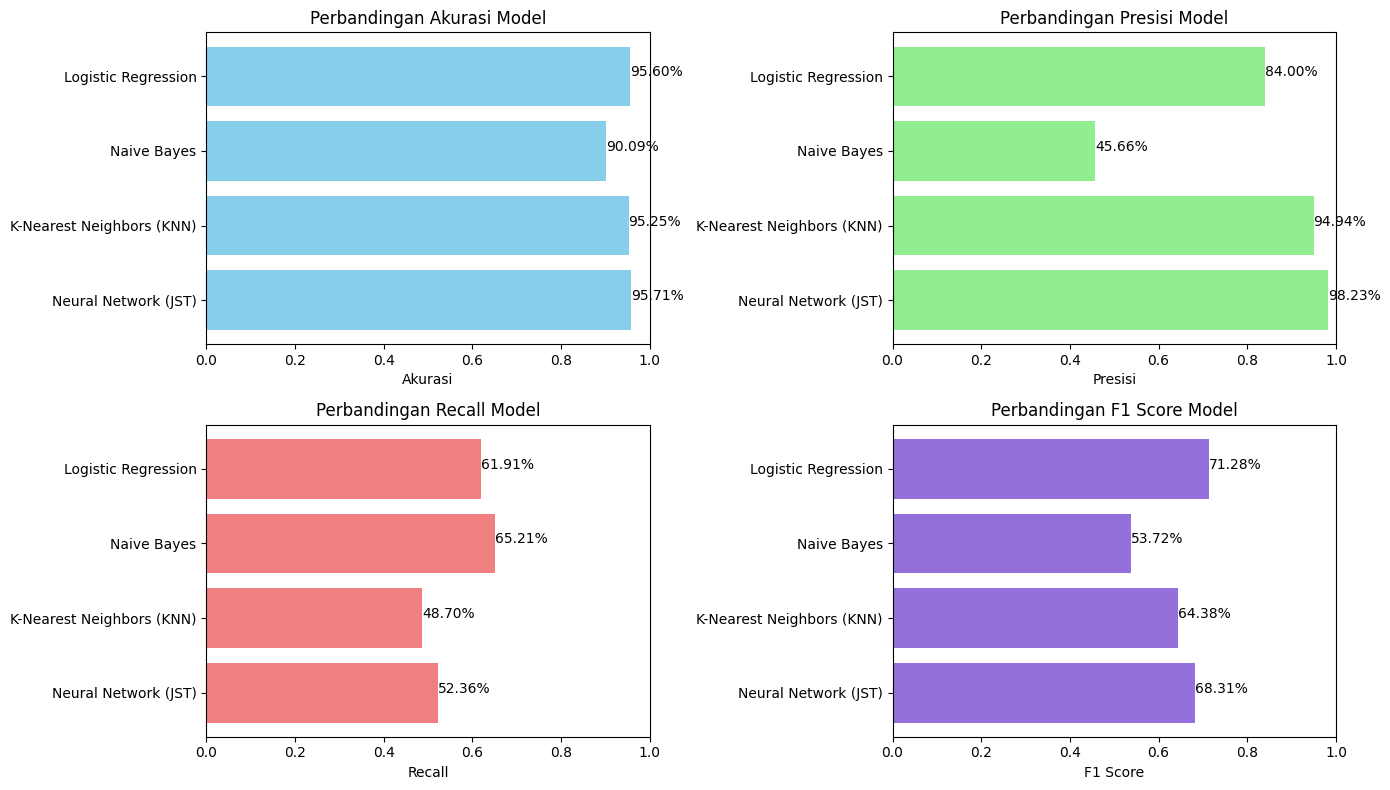

In [ ]:
# Plot metrik
models = ['Neural Network (JST)', 'K-Nearest Neighbors (KNN)', 'Naive Bayes', 'Logistic Regression']
akurasi = [jst_metrics[0], knn_metrics[0], nb_metrics[0], lr_metrics[0]]
presisi = [jst_metrics[1], knn_metrics[1], nb_metrics[1], lr_metrics[1]]
recall = [jst_metrics[2], knn_metrics[2], nb_metrics[2], lr_metrics[2]]
f1_scores = [jst_metrics[3], knn_metrics[3], nb_metrics[3], lr_metrics[3]]
confusion_matrices = [jst_metrics[4], knn_metrics[4], nb_metrics[4], lr_metrics[4]]

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.barh(models, akurasi, color='skyblue')
plt.xlabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.xlim(0, 1)
for index, value in enumerate(akurasi):
    plt.text(value, index, f'{value:.2%}')

plt.subplot(2, 2, 2)
plt.barh(models, presisi, color='lightgreen')
plt.xlabel('Presisi')
plt.title('Perbandingan Presisi Model')
plt.xlim(0, 1)
for index, value in enumerate(presisi):
    plt.text(value, index, f'{value:.2%}')

plt.subplot(2, 2, 3)
plt.barh(models, recall, color='lightcoral')
plt.xlabel('Recall')
plt.title('Perbandingan Recall Model')
plt.xlim(0, 1)
for index, value in enumerate(recall):
    plt.text(value, index, f'{value:.2%}')

plt.subplot(2, 2, 4)
plt.barh(models, f1_scores, color='mediumpurple')
plt.xlabel('F1 Score')
plt.title('Perbandingan F1 Score Model')
plt.xlim(0, 1)
for index, value in enumerate(f1_scores):
    plt.text(value, index, f'{value:.2%}')

plt.tight_layout()
plt.show()

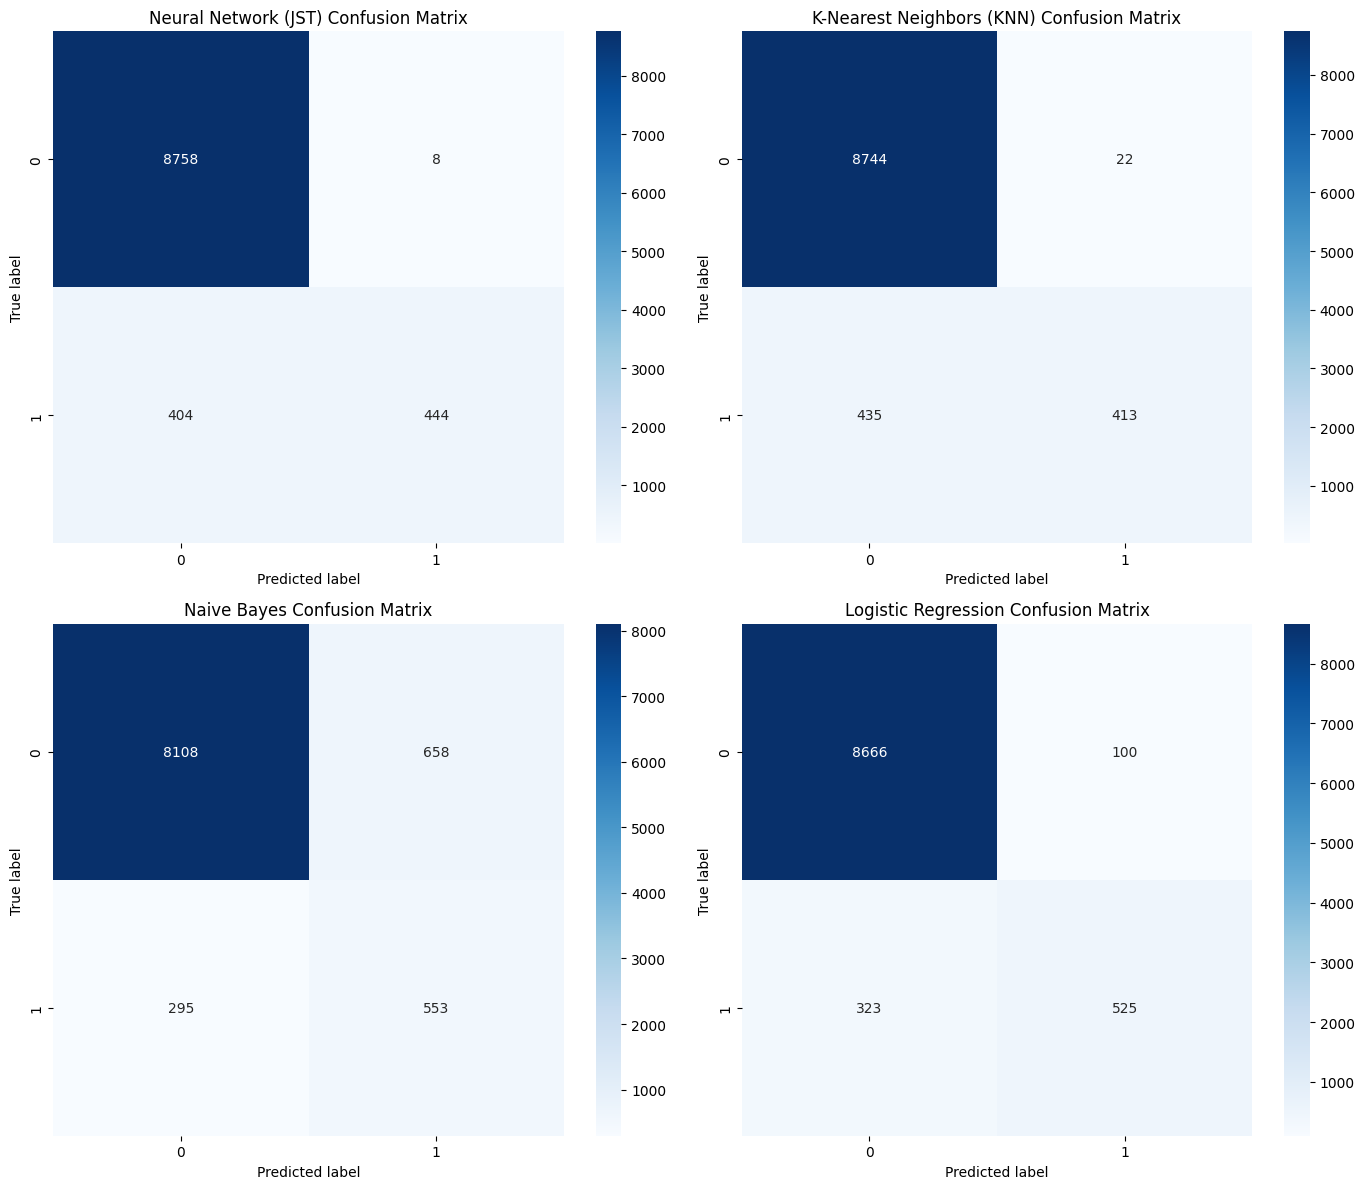

In [ ]:
# Plot confusion matrices
plt.figure(figsize=(14, 12))

for i, (model, cm) in enumerate(zip(models, confusion_matrices)):
    plt.subplot(2, 2, i + 1)
    # Use 'g' format code for general numeric formatting to handle both integers and floats
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'{model} Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

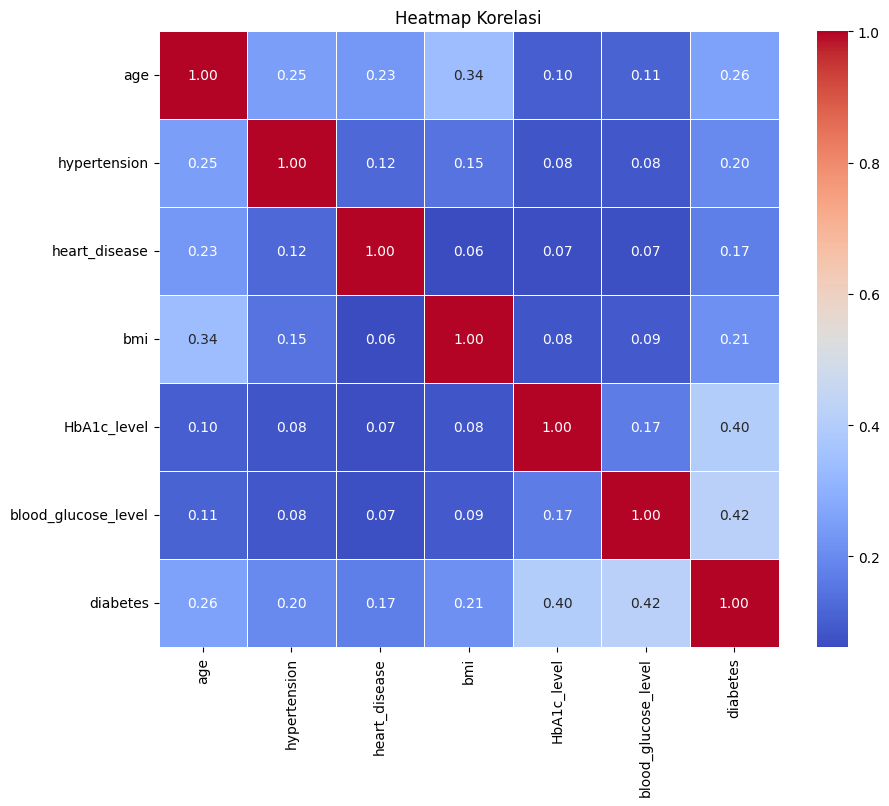

In [ ]:
# Drop non-numerical columns before calculating correlations
numerical_data = data.select_dtypes(include=['number'])
corr_matrix = numerical_data.corr()

# Visualisasikan korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()